In [13]:
%run ./resources/library.py
style_notebook()

Digital Case Study: Multidrug-Resistant Tuberculosis (MDR-TB) Outbreak - Revisiting the 2005 Outbreak Investigation in Thailand by John Oeltmann

# Part 2: Mapping the Analytic Data Sets from the Outbreak Investigation

We are half-way through the simulation [workflow](./resources/Work_flow_diagram2_08022017.pdf) described in Notebook 3. The red rectangle is highlighting our next step.


Now that we have successfully joined the case line listing data with the genotyping data and created the analytic dataset, we will create a map of the genotyped cases and symbolize these cases by drug-resistance type.  We receive an email that includes a MIRU-ID and classification of MIRU-ID by drug-resistance type. We need to create a new field in the analytic dataset for DRTYPE and code each line-listed case by this type. Please run the code below to classify the MIRU-IDs by DRTYPE:


In [19]:
import pandas as pd
import folium

In [20]:
# read the 3rd spreadsheet with MIRU-IDs and DRTYPE and create a data frame
# Import the excel file and call it xls_file
xls_file3 = pd.ExcelFile('resources/Thailand_cases_exercise_3rd_spreadsheet_07232017.xls')
xls_file3

In [21]:
# View the excel file's sheet names
xls_file3.sheet_names

['TBDATA3']

In [22]:
# Load the xls file's Sheet1 as a dataframe
df3 = xls_file3.parse('TBDATA3')
df3
df3.to_pickle("outputs/df3.p")

In [23]:
# merge the dataframe with DRTYPE with the previous merge to form the analytic dataset
df2b = pd.read_pickle("outputs/df2b.pickle")
df3b = pd.merge(df2b, df3, left_on='CaseNo', right_on='CaseNo')
df3b

,CaseNo,LON,LAT,COORDS,FAKEMIRUVNTR_x,FAKEMIRUID_x,SYMBOL,FAKEMIRUVNTR_y,FAKEMIRUID_y,DRTYPE
0,TH-102678,100.828607,14.704461,"14.704461,100.828607",012345678901234567893120,3,Blue Circle,012345678901234567893120,3,PANSUSCEPTIBLE
1,TH-101007,100.829347,14.702266,"14.702266,100.829347",012345678901234567894320,4,Green Circle,012345678901234567894320,4,UNKNOWN
2,TH-101290,100.825159,14.699828,"14.699828,100.825159",012345678901234567894320,4,Green Circle,012345678901234567894320,4,UNKNOWN
3,TH-101067,100.824887,14.700197,"14.700197,100.824887",012345678901234567894320,4,Green Circle,012345678901234567894320,4,UNKNOWN
4,TH-101184,100.829032,14.697482,"14.697482,100.829032",012345678901234567890423,5,Green Circle,012345678901234567890423,5,UNKNOWN
5,TH-100913,100.829261,14.702418,"14.702418,100.829261",012345678901234567893120,3,Green Circle,012345678901234567893120,3,PANSUSCEPTIBLE
6,TH-101176,100.829228,14.702959,"14.702959,100.829228",012345678901234567894320,4,Green Circle,012345678901234567894320,4,UNKNOWN
7,TH-101497,100.829140,14.702244,"14.702244,100.82914",012345678901234567894320,4,Green Circle,012345678901234567894320,4,UNKNOWN
8,TH-101280,100.829344,14.702908,"14.702908,100.829344",012345678901234567894320,4,Blue Circle,012345678901234567894320,4,UNKNOWN
9,TH-101055,100.829494,14.701485,"14.701485,100.829494",012345678901234567894320,4,Green Circle,012345678901234567894320,4,UNKNOWN


## Step 10. Mapping the Analytic Dataset with Genotyped TB Cases

Next, we will create a map of the analytic dataset with genotyped TB cases, symbolized by drug-resistance type. We wish to see a map of the cases within the refugee camp and to examine the types of TB within the camp, including MDR-TB cases. Please run the code below to create the map of TB cases within the camp.

In [24]:
# create 3rd map of the case data 
#Store the coordinates of the refugee camp listed in the EOC email
CAMP_COORDINATES = (14.699859, 100.829019)
# read in local csv of the TB Cases
tbcases2 = df2b

# create empty map zoomed in on Refugee camp
map3 = folium.Map(location=CAMP_COORDINATES, zoom_start=16)

for each in tbcases2.iterrows():   
        # for each MIRUID type we use a specific map symbol
        if each[1]['FAKEMIRUID']== 4:
            # unknown type: green circle
            unknowndr=folium.RegularPolygonMarker([each[1]['LAT'], \
                                                   each[1]['LON']], \
                                                  popup=each[1]['CaseNo'], \
                                                  fill_color='lightgreen', \
                                                  number_of_sides=12, \
                                                  radius=6).add_to(map3)
        if each[1]['FAKEMIRUID']== 3: 
            # pansusceptible type: blue circle
            Pansusceptible=folium.RegularPolygonMarker([each[1]['LAT'], \
                                                        each[1]['LON']], \
                                                       popup=each[1]['CaseNo'], \
                                                       fill_color='blue', \
                                                       number_of_sides=12, \
                                                       radius=6).add_to(map3)
        if each[1]['FAKEMIRUID']== 2:                     
            # resistant but not MDRTB: yellow square
            ResistantNotMDRTB=folium.RegularPolygonMarker([each[1]['LAT'], \
                                                           each[1]['LON']], \
                                                           popup=each[1]['CaseNo'], \
                                                          fill_color='yellow', \
                                                          number_of_sides=4, \
                                                          radius=8).add_to(map3)
        if each[1]['FAKEMIRUID']== 1:   
            # mdr-tb type: red triangle
            MDRTB=folium.RegularPolygonMarker([each[1]['LAT'], \
                                               each[1]['LON']], \
                                              popup=each[1]['CaseNo'], \
                                              fill_color='red', \
                                              number_of_sides=3, \
                                              radius=9).add_to(map3)                      
map3

## Step 11. Linking Cases


 The map of TB cases with MIRU-ID and Drug Resistance Type is helpful for the contact investigation team. They have conducted interviews of patients to try to establish potential epi-links between cases with similar genotypes and drug resistance patterns. The team has provided a [spreadsheet](./resources/Thailand_cases_exercise_4th_spreadsheet_07302017.xls) with unique patient IDs and epi-links to other patients.  We will read this spreadsheet as we have done with other source data. Please run the code below to read in the epi-link data.

In [25]:
# read the spreadsheet of epi-links and create a dataframe
# Import the excel file and call it xls_file4
xls_file4 = pd.ExcelFile('resources/Thailand_cases_exercise_4th_spreadsheet_07302017.xls')
xls_file4

In [26]:
# View the excel file's sheet names
xls_file4.sheet_names

['TBDATA4', 'EPILINKDATA']

In [27]:
# Load the xls file's Sheet1 as a dataframe
df4 = xls_file4.parse('EPILINKDATA')
df4

,ORIGNO,OLAT,OLON,DESTNO,DLAT,DLON
0,TH-101579,14.702731,100.828440,TH-101823,14.699857,100.828917
1,TH-101579,14.702731,100.828440,TH-102637,14.696637,100.829703
2,TH-101823,14.699857,100.828917,TH-101579,14.702731,100.828440
3,TH-101823,14.699857,100.828917,TH-101783,14.696434,100.828634
4,TH-101823,14.699857,100.828917,TH-102445,14.696133,100.828950
5,TH-101823,14.699857,100.828917,TH-102460,14.700809,100.827556
6,TH-101783,14.696434,100.828634,TH-101823,14.699857,100.828917
7,TH-102445,14.696133,100.828950,TH-101823,14.699857,100.828917
8,TH-102460,14.700809,100.827556,TH-101823,14.699857,100.828917
9,TH-102637,14.696637,100.829703,TH-101579,14.702731,100.828440


In [28]:
df4.to_pickle("outputs/df4.p")

## Step 12. Visualizing Links Between Cases

Next we will create a polyline of the epi-links between patients and add this to our GIS map visualization. Please run the code below to create the shapefile of epi-links.

In [32]:
# create 3rd map of the case data 
#Store the coordinates of the refugee camp listed in the EOC email
CAMP_COORDINATES = (14.699859, 100.829019)
# read in local csv of the TB Cases
tbcases2 = df2b
# for speed purposes
MAX_RECORDS = 1000
# create empty map zoomed in on Refugee camp
map3 = folium.Map(location=CAMP_COORDINATES, zoom_start=16)

for each in tbcases2[0:MAX_RECORDS].iterrows():   
        if each[1]['FAKEMIRUID']== 1:                     
            folium.RegularPolygonMarker([each[1]['LAT'],\
                                         each[1]['LON']], \
                                        popup=each[1]['CaseNo'], \
                                        fill_color='red', \
                                        number_of_sides=3, \
                                        radius=8).add_to(map3)
map3

### Visualizing Links Between Cases

Next we need to create a polyline of the epi-links between patients and add this to our GIS map visualization. Run the code below to create the shapefile of epi-links.

In [35]:
# create a polyline of the epi-links between cases and 
#    add the polyline of epi-links to the 3rd map of TB cases
from folium import plugins 

#Store the coordinates of the refugee camp listed in the EOC email
CAMP_COORDINATES = (14.699859, 100.829019)

#use data frame 4 to build the required array of polyline locations
for each in df4.iterrows():
    # store the coordinates for the epilink lines    
    epilink = [(each[1]['OLAT'],each[1]['OLON']),(each[1]['DLAT'],each[1]['DLON'])]
    
    #get the coordinates for epilinks
    lats = [x[0] for x in epilink]
    lons = [x[1] for x in epilink]
    
    p1 = [lats[0], lons[0]]
    p2 = [lats[1], lons[1]]
        
            
    folium.PolyLine(locations=[p1, p2], weight=2, color = 'gray').add_to(map3)
    
    
map3 

### Follow-up Contact Investigation

We now have a map of the TB cases by MIRU-ID, Drug Resistant Type, and have displayed known epi links between cases. There are several cases that have the same MIRU-ID and Drug Resistance type, and are located close together, and yet were not established as epi-linked cases. The TB Contact investigation team has asked if the EOC geographers can help to find suspect cases such as these and provide a line listing for a 2nd round of contact interviews. 

Please select the suspect cases that fall in this category by running the code below.


In [36]:
# select the cases with the same genotype and miruid that are proximate but not epi-linked
# read the spreadsheet of epi-links and create a dataframe
# Import the excel file and call it xls_file4
xls_file4 = pd.ExcelFile('resources/Thailand_cases_exercise_4th_spreadsheet_07302017.xls')
xls_file4

# View the excel file's sheet names
xls_file4.sheet_names

# Load the xls file's Sheet1 as a dataframe
df4b = xls_file4.parse('TBDATA4')

#A query checking the textual content of the cells
df4b[df4b.EPILINKID1.str.contains('NO EPI LINKS')]
df4b[df4b.EPILINKID1.str.contains('NO EPI LINKS')].to_pickle("outputs/df4b_subset.p")

df4b

,CaseNo,LON,LAT,COORDS,FAKEMIRUVNTR,FAKEMIRUID,SYMBOL,EPILINKID1,EPILINKID2,EPILINKID3,EPILINKID4
0,TH-101579,100.828440,14.702731,"14.702731,100.82844",012345678901234567890123,1,Red Triangle,TH-101823,TH-102637,NO EPI LINKS,NO EPI LINKS
1,TH-101823,100.828917,14.699857,"14.699857,100.828917",012345678901234567890123,1,Red Triangle,TH-101579,TH101783,TH-102445,TH-102460
2,TH-101783,100.828634,14.696434,"14.696434,100.828634",012345678901234567890123,1,Red Triangle,TH-101823,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS
3,TH-102445,100.828950,14.696133,"14.696133,100.82895",012345678901234567890123,1,Red Triangle,TH-101823,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS
4,TH-102460,100.827556,14.700809,"14.700809,100.827556",012345678901234567890123,1,Red Triangle,TH-101823,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS
5,TH-102637,100.829703,14.696637,"14.696637,100.829703",012345678901234567890123,1,Red Triangle,TH-101579,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS
6,TH-101651,100.829259,14.700701,"14.700701,100.829259",012345678901234567890123,1,Red Triangle,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS
7,TH-101931,100.829533,14.700087,"14.700087,100.829533",012345678901234567890123,1,Red Triangle,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS
8,TH-103347,100.830247,14.697342,"14.697342,100.830247",012345678901234567890123,1,Red Triangle,TH-103009,TH-102909,TH-103773,NO EPI LINKS
9,TH-103009,100.831095,14.699261,"14.699261,100.831095",012345678901234567890123,1,Red Triangle,TH-103347,NO EPI LINKS,NO EPI LINKS,NO EPI LINKS


### Exporting to CSV

We will create a line listing of these suspected epi-link cases and export as a comma-delimited text file to send to the contact investigation team. Please run the code below to export a line listing to a csv.

In [37]:
# export the suspected epi-linked cases to a comma-delimited text file (.csv)
#data frame you wish to export
df5 = df4b[df4b.EPILINKID1.str.contains('NO EPI LINKS')]

df5.to_csv('outputs/suspected_epilink_cases.csv')



### Second Interview


The contact investigation team has conducted secondary interviews and they have found additional epi-links. They have provided a new spreadsheet with the additional epi-linked cases. We will read this spreadsheet as a new data frame. Please run the code below.

In [38]:
# read the spreadsheet of new epi-linked cases and create a dataframe
# create a polyline shapefile of the new epi-linked cases
# read the spreadsheet of epi-links and create a dataframe
# Import the excel file and call it xls_file4
xls_file5 = pd.ExcelFile('resources/Thailand_cases_exercise_5th_spreadsheet_07312017.xls')
xls_file5

# View the excel file's sheet names
xls_file5.sheet_names

# Load the xls file's Sheet1 as a dataframe
df5b = xls_file5.parse('NEWEPILINKDATA')
df5b
df5b.to_pickle("outputs/df5b.p")

df5b

,ORIGNO,OLAT,OLON,DESTNO,DLAT,DLON
0,TH-101579,14.702731,100.828440,TH-103927,14.700072,100.829917
1,TH-101579,14.702731,100.828440,TH-104039,14.697903,100.829623
2,TH-104039,14.697903,100.829623,TH-101579,14.702731,100.828440
3,TH-103927,14.700072,100.829917,TH-104090,14.698245,100.830587
4,TH-103927,14.700072,100.829917,TH-101579,14.702731,100.828440


We will update the map with the new epi-links and export this map to a PDF for the EOC daily report. Please run the code below.


In [41]:
# create a polyline of the epi-links between cases and add the polyline of epi-links to the 3rd map of TB cases
# store the coordinates for the epilink lines

# create a polyline of the epi-links between cases and add the polyline of epi-links to the 3rd map of TB cases

#use data frame 5 to build the required array of polyline locations
for each in df5b.iterrows():
   
    # store the coordinates for the epilink lines    
    epilink = [(each[1]['OLAT'],each[1]['OLON']),(each[1]['DLAT'],each[1]['DLON'])]
    
    #get the coordinates for epilinks
    lats = [x[0] for x in epilink]
    lons = [x[1] for x in epilink]
    
    p1 = [lats[0], lons[0]]
    p2 = [lats[1], lons[1]]                   
    
    
    #plot the epi-link polylines    
    folium.PolyLine(locations=[p1, p2],weight=1,color = 'blue').add_to(map3)

map3   


### Social Network Analysis

Some of the epidemiologists are interested in Social Network Analysis but do not wish to visualize the epi-links on a map -- but simply as a set of Gephi nodes and links. Run the code below to generate a social network graph:


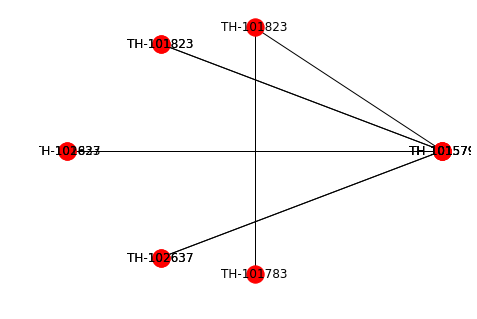

In [42]:
# import social network analyses packages 
%matplotlib inline
import networkx as nx
import pylab as plt

snadf = df4
node =0

G=nx.Graph()

for each in df4.iterrows():
    # Add nodes and edges
    
    G.add_edge(each[1]['ORIGNO'], each[1]['DESTNO'])
    node=node+1
    if node < 5:     
        nx.draw_circular(G, with_labels = True)     


## Case Study Questions

### Question 1. 

Recent papers from South Africa suggest XDR-TB threats involve direct transmission and require high-precision geographic data and molecular epidemiology data to stop transmission. The 2005 outbreak from Thailand suggests the same. How can we plan to gather the required, high-precision geographic data and molecular epi data required for future outbreaks?

Please type your answer below:


### Question 2


 Tuberculosis may often be found within areas of crowding, poor ventilation....how can we learn from the past to predict areas of potential future outbreaks?

Please type your answer below:


### Congratulations, you have completed the MDR-TB Case Study!


## References


CDC, 2017 Tuberculosis Genotyping: What is tuberculosis (TB) genotyping? CDC TB Fact Sheets 2017. URL: https://www.cdc.gov/tb/publications/factsheets/statistics/genotyping.htm

CDC, 2017 GENType: New Genotyping Terminology to Integrate 24-locus MIRU-VNTR. CDC TB Fact Sheets 2017. URL: https://www.cdc.gov/tb/publications/factsheets/statistics/genotypingterminology.pdf

CDC, 2017 A New Tool to Diagnose Tuberculosis: The Xpert MTB/RIF Assay. URL: https://www.cdc.gov/tb/publications/factsheets/pdf/xpertmtb-rifassayfactsheet_final.pdf

Oeltmann, J. E., Varma, J. K., Ortega, L., Liu, Y., O’Rourke, T., Cano, M., … Maloney, S. A. (2008). Multidrug-Resistant Tuberculosis  Outbreak among US-bound Hmong  Refugees, Thailand, 2005. Emerging Infectious Diseases, 14(11), 1715–1721. http://doi.org/10.3201/eid1411.071629

Shaw, N.S., et al. 2017. Transmission of Extensively Drug-Resistant Tuberculosis in South Africa. New England Journal of Medicine. January 19, 2017. 376:3.                                                  URL: http://www.nejm.org/doi/pdf/10.1056/NEJMoa1604544

Additional readings:
Reichmann, Lee B and Janice Hopkins Tanne. 2001. Timebomb: the global epidemic of multi-drug resistant tuberculosis. ISBN 0-07-135924-9. McGraw-Hill. URL: https://www.goodreads.com/book/show/1733578